In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

World Happiness Report Dataset

In [4]:
whr_df = pd.read_csv("whr2023.csv")
whr_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


Filter the columns and copy only the ones that will be used for analysis.



In [5]:
columns = ['Country name', 'iso alpha', 'Regional indicator', 'Happiness score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
happy_df = whr_df[columns].copy()
happy_df.head()

,Country name,iso alpha,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


Convert all column names to lowercase.



In [6]:
happy_df.columns = happy_df.columns.str.lower()
happy_df.head()

,country name,iso alpha,regional indicator,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
0,Afghanistan,AFG,South Asia,1.859,7.324,0.341,54.712,0.382,-0.081,0.847
1,Albania,ALB,Central and Eastern Europe,5.277,9.567,0.718,69.150,0.794,-0.007,0.878
2,Algeria,DZA,Middle East and North Africa,5.329,9.300,0.855,66.549,0.571,-0.117,0.717
3,Argentina,ARG,Latin America and Caribbean,6.024,9.959,0.891,67.200,0.823,-0.089,0.814
4,Armenia,ARM,Commonwealth of Independent States,5.342,9.615,0.790,67.789,0.796,-0.155,0.705


Data Info

In [7]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country name                  137 non-null    object 
 1   iso alpha                     137 non-null    object 
 2   regional indicator            137 non-null    object 
 3   happiness score               137 non-null    float64
 4   logged gdp per capita         137 non-null    float64
 5   social support                137 non-null    float64
 6   healthy life expectancy       136 non-null    float64
 7   freedom to make life choices  137 non-null    float64
 8   generosity                    137 non-null    float64
 9   perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [8]:
# Check if there are any missing values
happy_df.isnull().sum()

country name                    0
iso alpha                       0
regional indicator              0
happiness score                 0
logged gdp per capita           0
social support                  0
healthy life expectancy         1
freedom to make life choices    0
generosity                      0
perceptions of corruption       0
dtype: int64

In [9]:
happy_df[happy_df.isnull().any(axis = 1)]

,country name,iso alpha,regional indicator,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
116,State of Palestine,PSE,Middle East and North Africa,4.908,8.716,0.859,NaN,0.694,-0.132,0.836


In [10]:
# Choose the numerical columns for further analysis
numerical_columns = ['happiness score', 'logged gdp per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity', 'perceptions of corruption']
happy_df[numerical_columns].describe()

,happiness score,logged gdp per capita,social support,healthy life expectancy,freedom to make life choices,generosity,perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


In [11]:
# Create a function that displays the distribution of numerical data using both histograms and boxplots.
def show_distribution(var):
    var_min = happy_df[var].min()
    var_mean = happy_df[var].mean()
    var_median = happy_df[var].median()
    var_mode = happy_df[var].mode()[0]
    var_max = happy_df[var].max()
    
    # Histogram 
    fig, ax = plt.subplots(2, 1, figsize = (8,8))
    sns.histplot(happy_df, x = var, kde = True, color = 'red', alpha = 0.2, ax = ax[0])
    ax[0].set_ylabel("Frequency")
    
    ax[0].axvline(x = var_min, color = 'gray', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mean, color = 'blue', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_median, color = 'brown', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_mode, color = 'cyan', linewidth = 2, linestyle = "--")
    ax[0].axvline(x = var_max, color = 'gray', linewidth = 2, linestyle = "--")
    
    # Box plot
    sns.boxplot(happy_df, x = var, width = 0.3, ax = ax[1],)
    ax[1].set_xlabel("Value")
    
    fig.suptitle("Data Distribution - " + var, size = 15)
    fig.show()

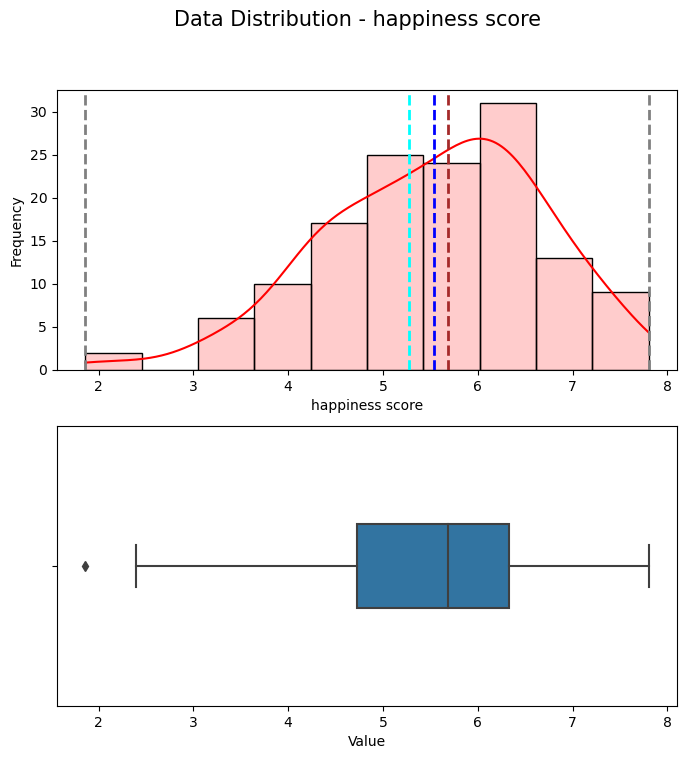

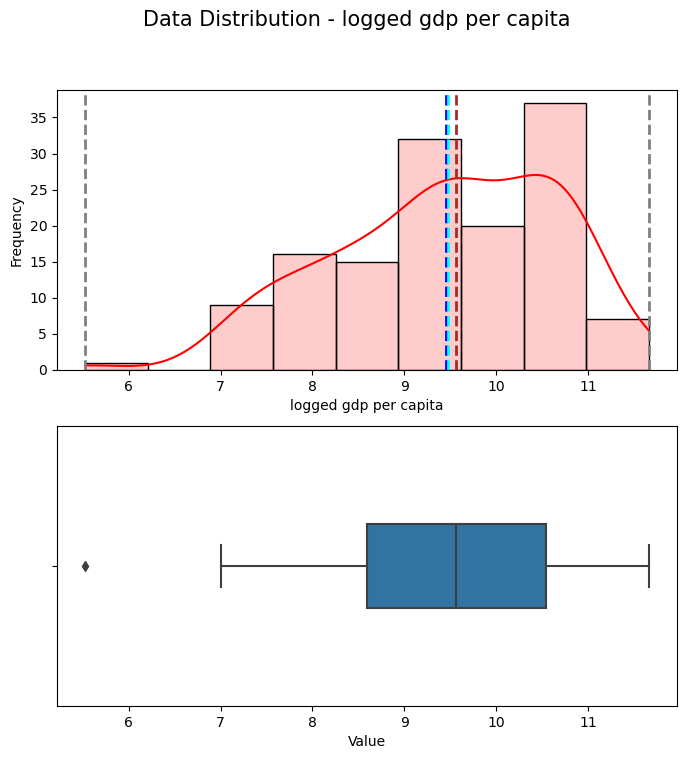

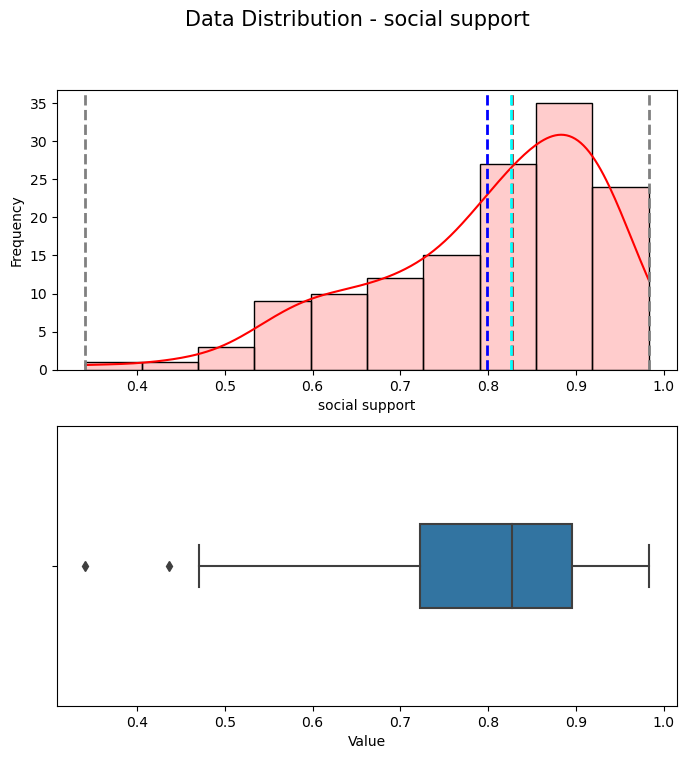

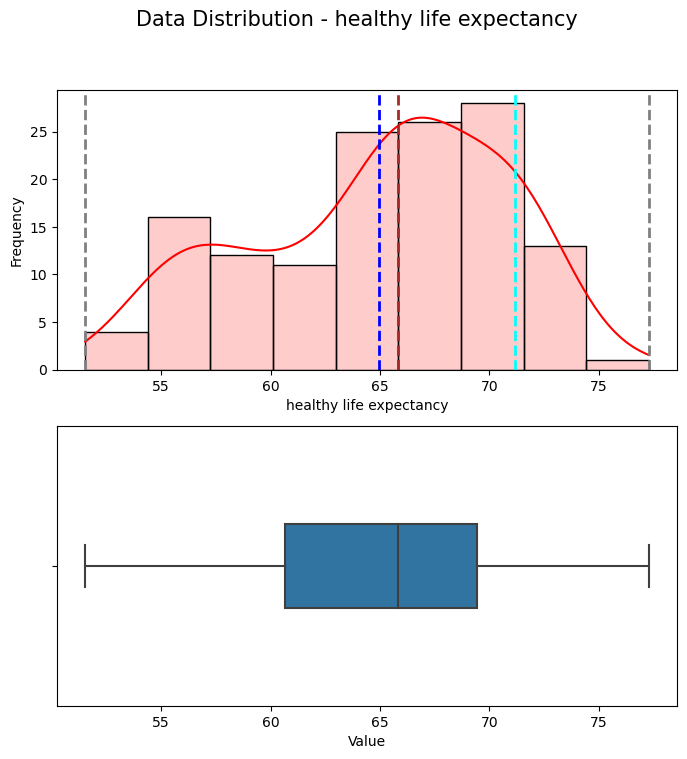

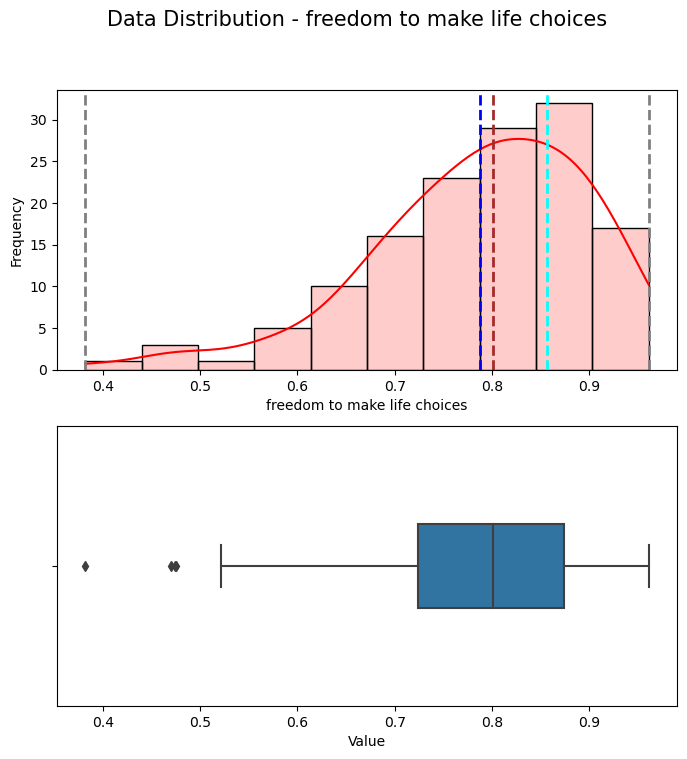

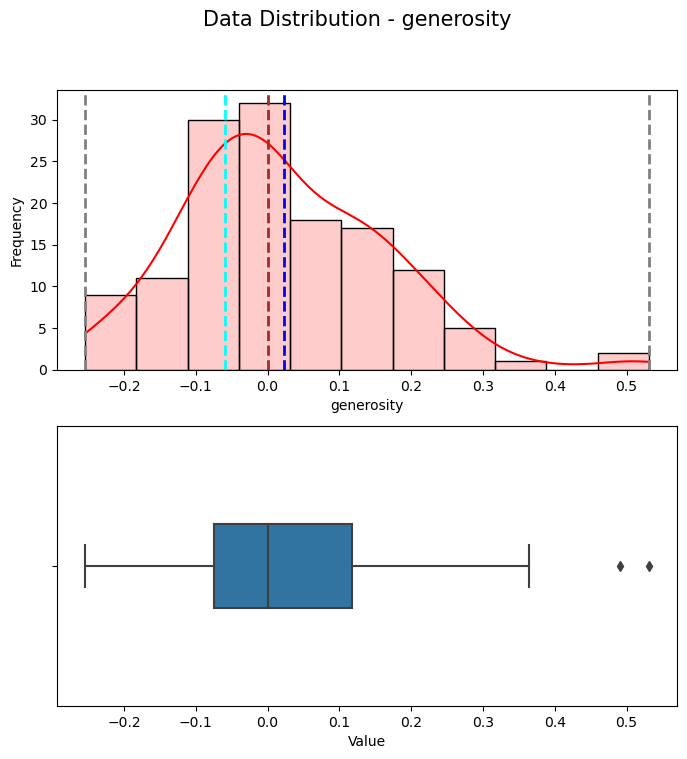

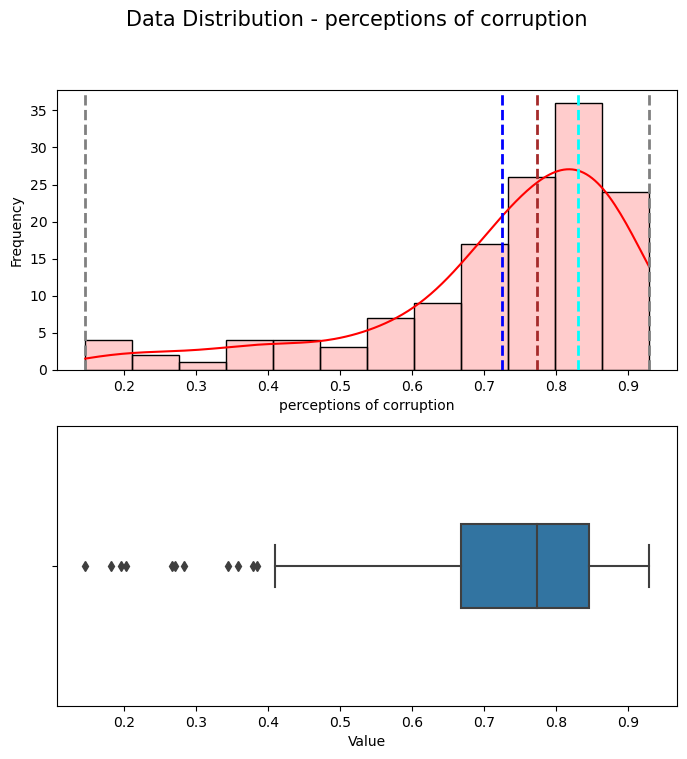

In [12]:
# Call show_distribution function
for column in numerical_columns:
    show_distribution(column)

Generate a heatmap to identify the correlation



<Axes: >

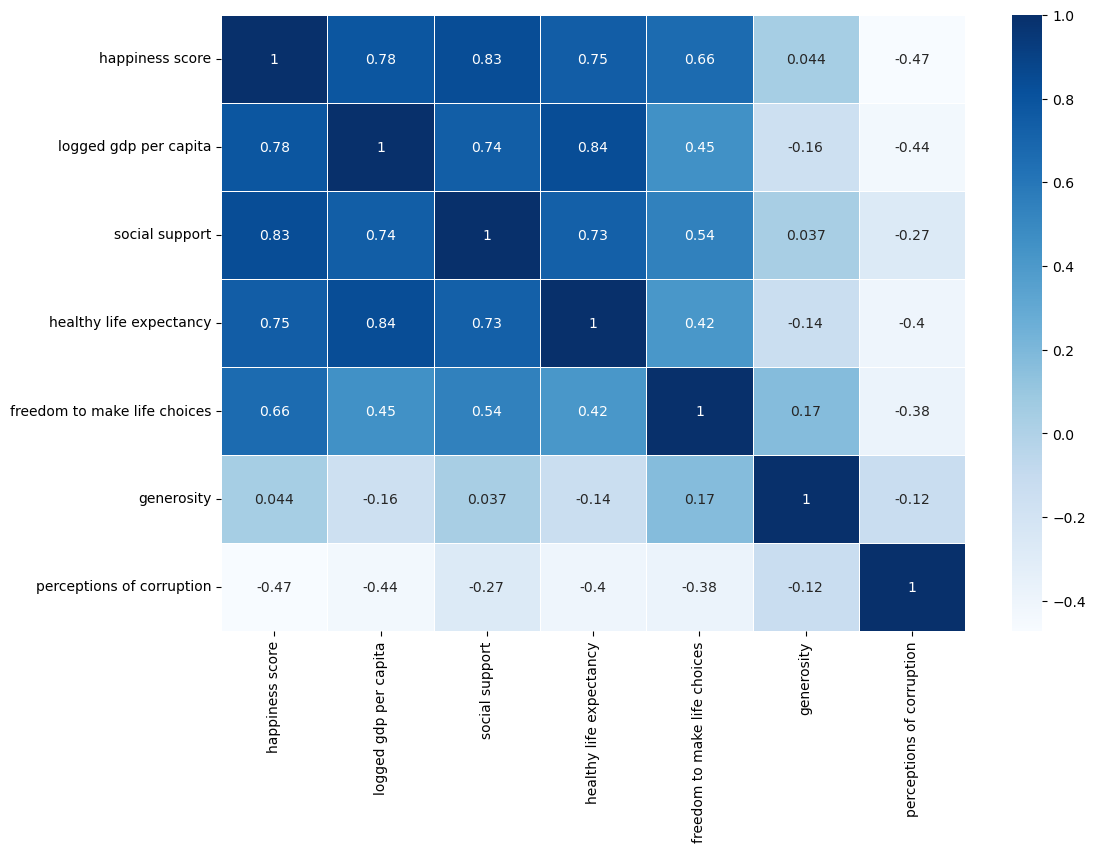

In [13]:
# Generate a heatmap to identify the correlation
corr = happy_df.corr()
fig = plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'Blues', linewidth = 0.5, annot = True)

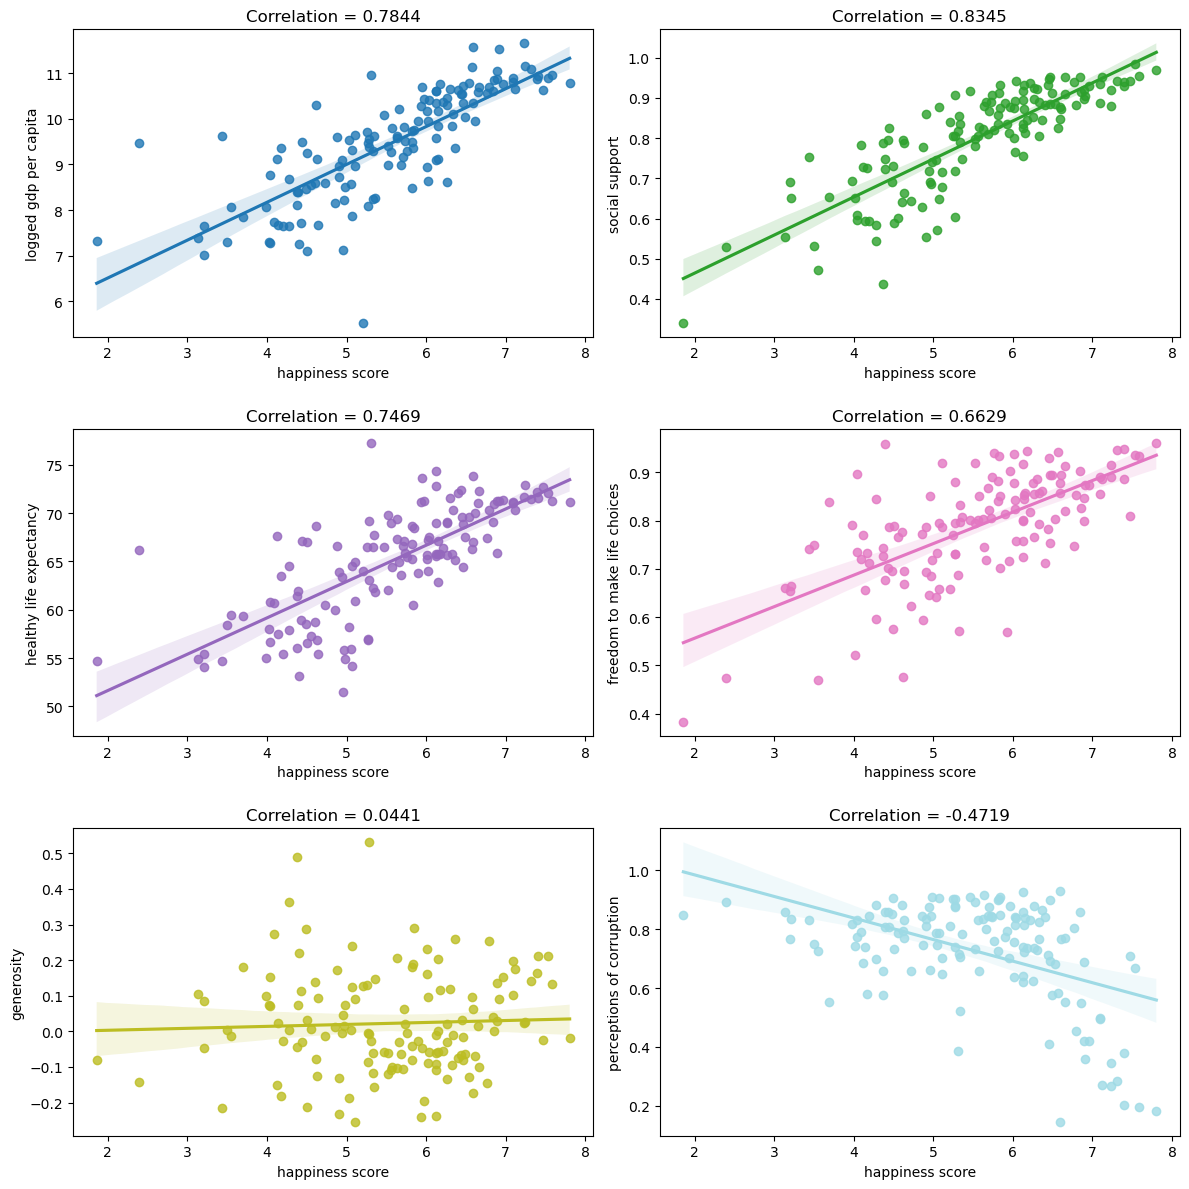

In [14]:
#Happiness score vs other factors
tab_20_colors = ["#1f77b4", "#2ca02c", "#9467bd", "#e377c2", "#bcbd22", "#9edae5"]
fig, ax = plt.subplots(3, 2, figsize = (12,12))
i = 0
for j, column in enumerate(numerical_columns[1:]):
    corr = happy_df['happiness score'].corr(happy_df[column])
    sns.regplot(happy_df, x = "happiness score", y = column, color = tab_20_colors[i], ax = ax[j//2, j%2])
    ax[j//2, j%2].set_title("Correlation = {:.4f}".format(corr))
    i += 1 
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

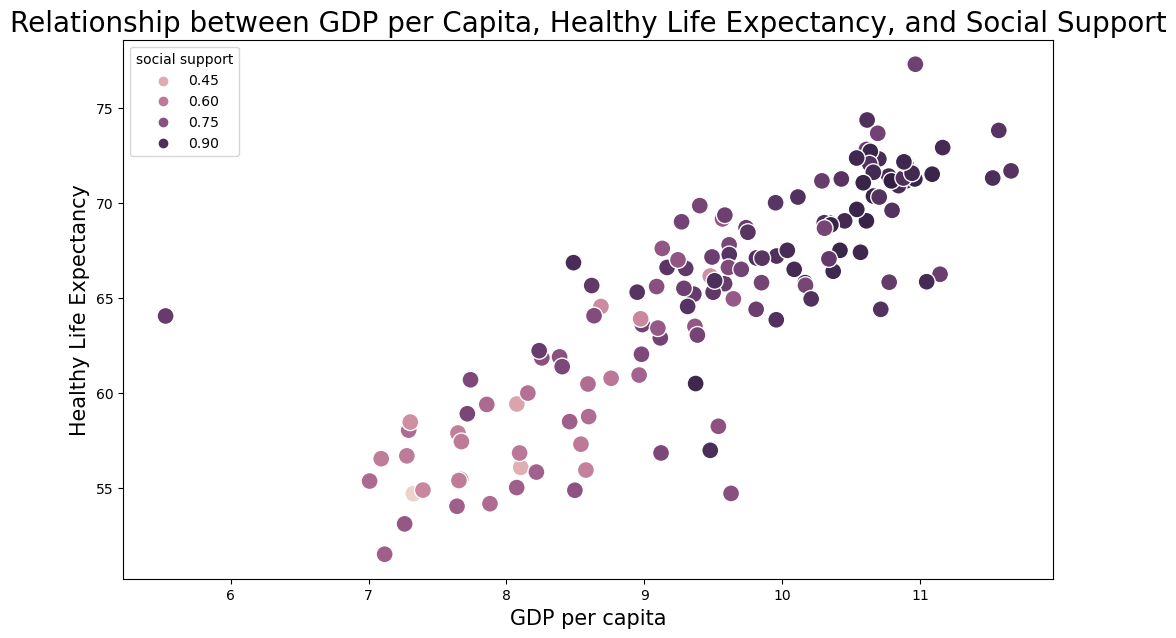

In [15]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(happy_df, x = "logged gdp per capita", y = "healthy life expectancy", hue = "social support", s = 150)
plt.xlabel("GDP per capita", size = 15)
plt.ylabel("Healthy Life Expectancy", size = 15)   
plt.title("Relationship between GDP per Capita, Healthy Life Expectancy, and Social Support", size = 20)
plt.show()

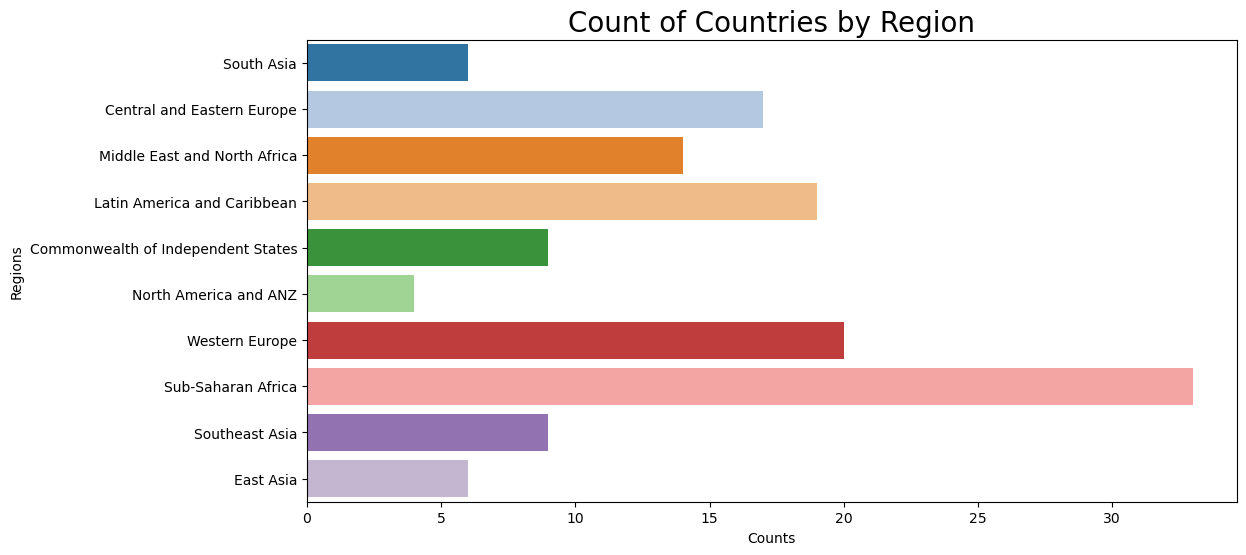

In [16]:
#Count of Countries by Region
fig = plt.figure(figsize = (12,6))
sns.countplot(happy_df, y = 'regional indicator', palette = 'tab20')
plt.ylabel("Regions")
plt.xlabel("Counts")
plt.title("Count of Countries by Region", size = 20)
plt.show()

Text(0.5, 1.0, 'Happiness Score by region')

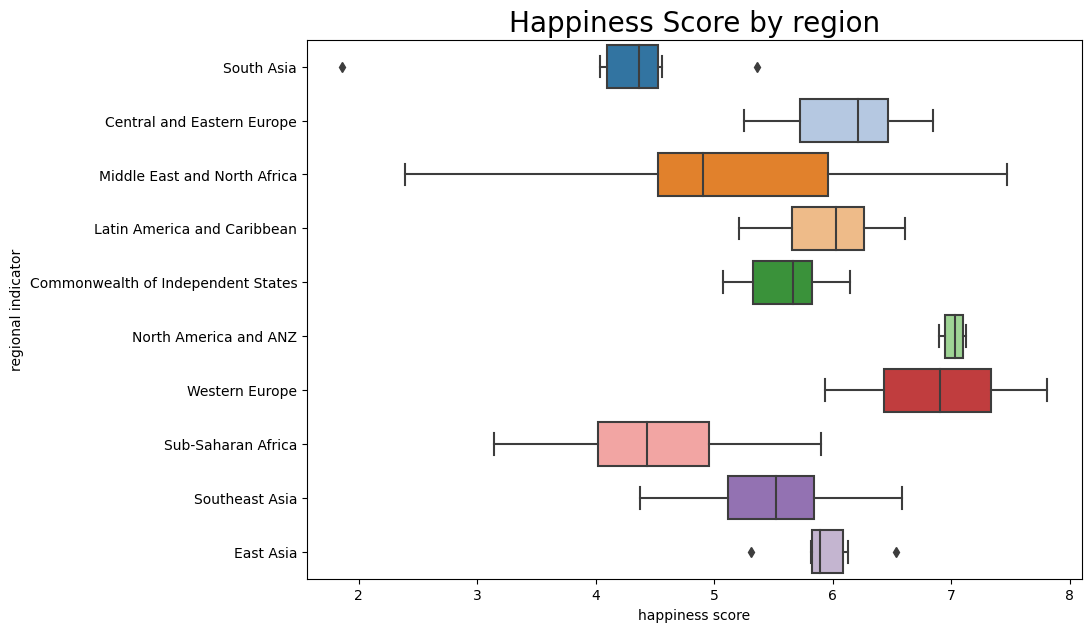

In [17]:
#Boxplot
fig = plt.figure(figsize = (10,7))
sns.boxplot(happy_df, y = 'regional indicator', x = "happiness score", palette = 'tab20')
plt.title("Happiness Score by region", size = 20)

An analysis was conducted to further explore the factors that may contribute to higher or lower happiness scores across different regions. A bar chart was created to depict the average values of various factors, such as GDP per capita, social support, healthy life expectancy, etc., across different regions.

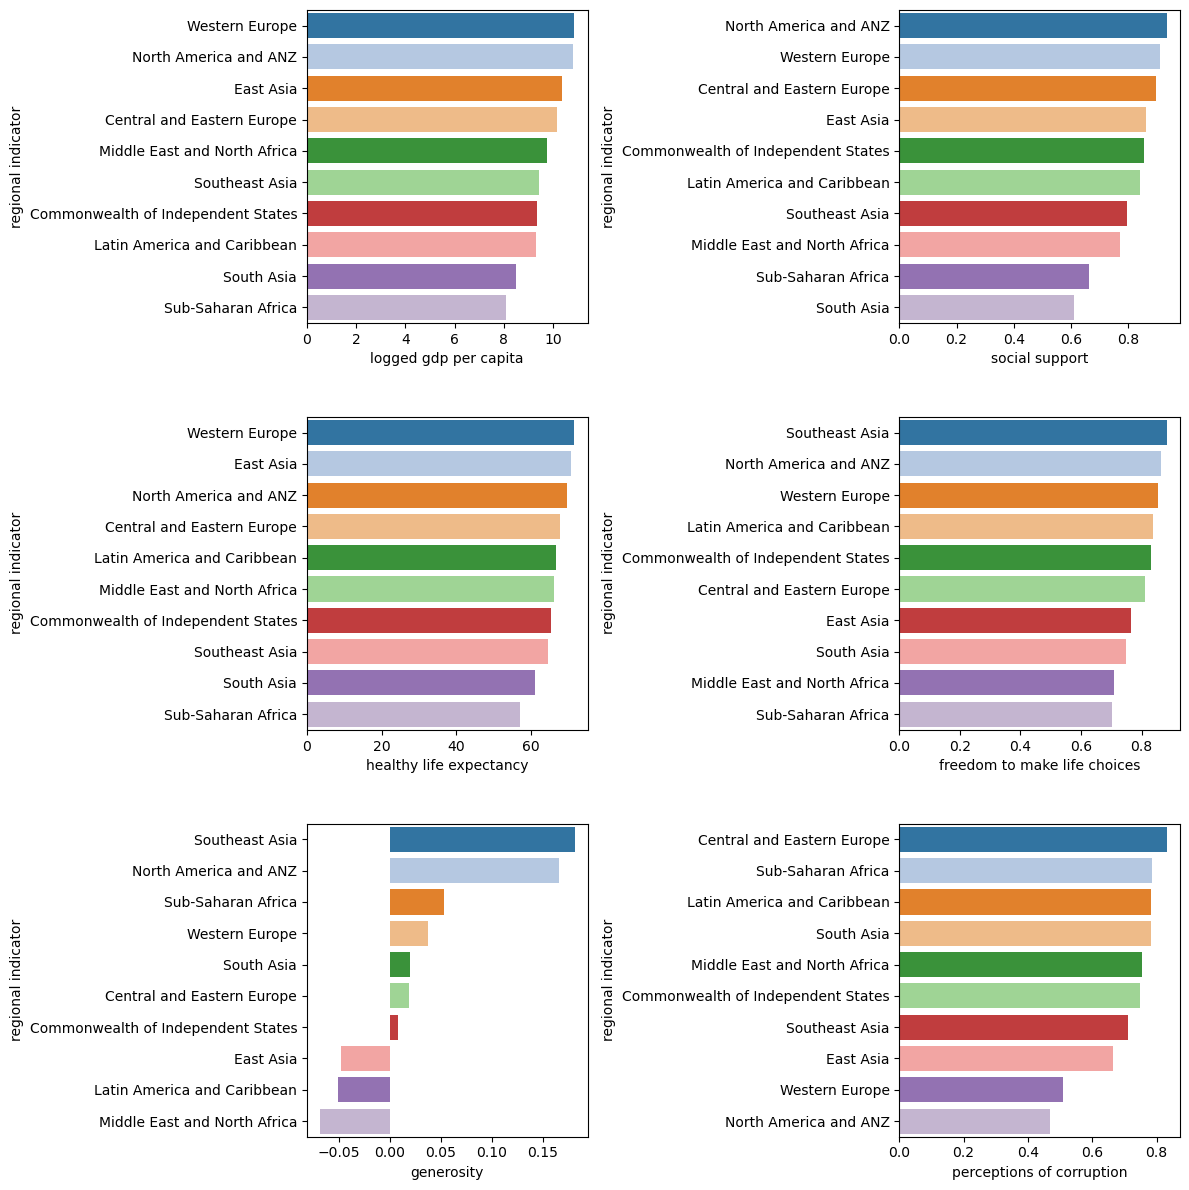

In [18]:
region_wise = happy_df.groupby("regional indicator")[numerical_columns].mean().reset_index()
fig, ax = plt.subplots(3, 2, figsize = (12,12))
for i, column in enumerate(numerical_columns[1:]):
    region_wise.sort_values(column, ascending = False, inplace = True)
    sns.barplot(region_wise, x = column, y = 'regional indicator', palette = 'tab20', ax = ax[i//2, i%2])
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.show()

It is suggested by this analysis that regions with higher median happiness scores, such as Western Europe, North America, and ANZ, tend to have higher average values in various key factors, including GDP per capita, social support, healthy life expectancy, and freedom to make life choices, compared to regions with lower median happiness scores.
Moreover, these regions exhibit lower average values in factors that are negatively associated with happiness levels, such as perceptions of corruption.
These findings underscore the significance of economic prosperity, social support networks, access to healthcare, and freedom to make life choices in promoting happiness and well-being across different regions.

In [ ]:
Top 10 happiest and least happy countries.



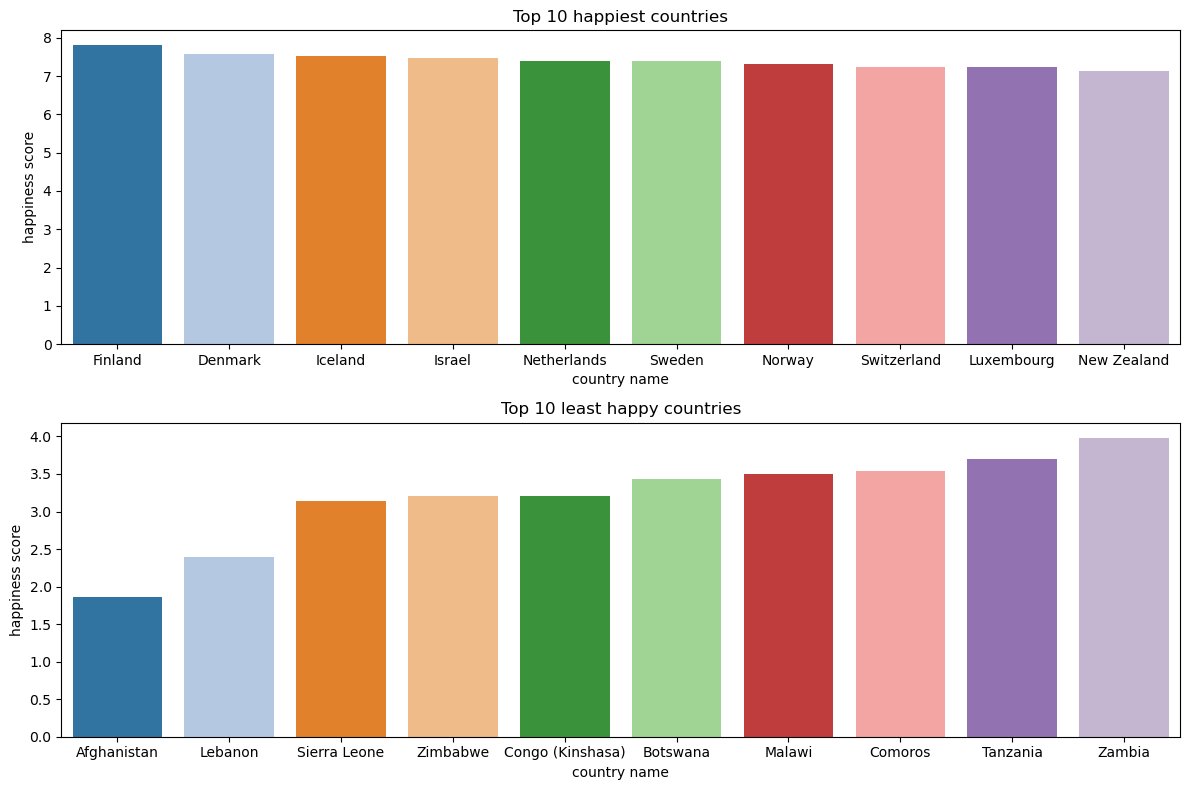

In [19]:
#A column chart was created to analyze the top 10 happiest and least happy countries.
top_10_happy_country = happy_df.sort_values('happiness score', ascending = False)
bottom_10_happy_country = happy_df.sort_values('happiness score', ascending = True)

fig, ax = plt.subplots(2, 1, figsize = (12,8))

sns.barplot(top_10_happy_country.iloc[:10], y = 'happiness score', x = 'country name', palette = 'tab20', ax = ax[0])
ax[0].set_title("Top 10 happiest countries")



sns.barplot(bottom_10_happy_country.iloc[:10], y = 'happiness score', x = 'country name', palette = 'tab20', ax = ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
fig.show()

In [ ]:
A country-by-country analysis



In [ ]:
happy_df_time_line = pd.read_csv("whr_200522.csv")
happy_df_time_line.sort_values('year', inplace = True)

In [ ]:
px.choropleth(happy_df_time_line, locations="Iso alpha", color="Happiness score", animation_frame="year" ,hover_name="Country name", range_color=[0,8], color_continuous_scale=px.colors.diverging.RdBu, width = 950, height = 600, title = "Global Happiness Scores: A Country-by-Country Analysis")


# Conclusion